# Module load

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

# Data load

In [2]:
def load_data(path):
    data_nc = xr.open_dataset(path)
    # save all the variables in data_nc file as a list.
    var_list = list(data_nc.data_vars.keys())
    
    #if the index of a variable of interest is not 0, 
    #you could edit the index number from 0 to other number in the very below line.
    var = var_list[0]
    data = data_nc.data_vars[var]
    print("completely load data with variable \"{0}\"".format(var))
    return data

In [3]:
path = 'C:/Users/ahcho/OneDrive/workspace/Python/github/Land_ocean_maskout/ERA5_monthly_averaged_1959-2022_2mtemp.nc'
data = load_data(path)
data = data.sel(expver=1).combine_first(data.sel(expver=5))
data.load()

completely load data with variable "t2m"


<xarray.DataArray 't2m' (time: 768, latitude: 721, longitude: 1440)>
array([[[244.4074 , 244.4074 , 244.4074 , ..., 244.4074 , 244.4074 ,
         244.4074 ],
        [244.27869, 244.27869, 244.27869, ..., 244.27692, 244.27692,
         244.27692],
        [244.14468, 244.14468, 244.14644, ..., 244.13939, 244.13939,
         244.14116],
        ...,
        [245.0351 , 245.03334, 245.03334, ..., 245.03687, 245.03687,
         245.0351 ],
        [244.91696, 244.91519, 244.91519, ..., 244.91696, 244.91696,
         244.91696],
        [244.69833, 244.69833, 244.69833, ..., 244.69833, 244.69833,
         244.69833]],

       [[240.96211, 240.96211, 240.96211, ..., 240.96211, 240.96211,
         240.96211],
        [240.79813, 240.79813, 240.79813, ..., 240.7999 , 240.79813,
         240.79813],
        [240.6518 , 240.6518 , 240.6518 , ..., 240.6518 , 240.6518 ,
         240.6518 ],
...
        [235.237  , 235.23524, 235.23524, ..., 235.237  , 235.237  ,
         235.237  ],
        [235.3093 , 235.3093 , 235.3093 , ..., 235.3093 , 235.3093 ,
         235.3093 ],
        [235.00427, 235.00427, 235.00427, ..., 235.00427, 235.00427,
         235.00427]],

       [[249.7975 , 249.7975 , 249.7975 , ..., 249.7975 , 249.7975 ,
         249.7975 ],
        [250.16777, 250.16953, 250.16953, ..., 250.166  , 250.166  ,
         250.16777],
        [250.35995, 250.36348, 250.367  , ..., 250.35466, 250.35643,
         250.35818],
        ...,
        [244.75475, 244.75475, 244.75299, ..., 244.76004, 244.75827,
         244.75652],
        [244.71773, 244.71773, 244.71596, ..., 244.71948, 244.71948,
         244.71948],
        [244.45148, 244.45148, 244.45148, ..., 244.45148, 244.45148,
         244.45148]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2022-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

# Transform longitude and latitude
Transform longitude into -180 ~ 180.  
Sort longitude and latitude in ascending order

In [4]:
def sort_latlon(data):
    data_ = data.assign_coords({"longitude" : (((data.longitude + 180) % 360) - 180)})
    data_ = data_.sortby('longitude')
    data_ = data_.sortby('latitude')
    return data_

In [5]:
def mon_mon(month, start = int, end = int):
    # month should be a form of  data['time.month']
    # input start month and end month with int type
    # ex - if you need MAM season, you can input "start = 3, end = 5"
    print("return data for {0} ~ {1} th month".format(start, end))
    return (month >= start) & (month <= end)

In [6]:
# transform longitude
data = sort_latlon(data)
data

<xarray.DataArray 't2m' (time: 768, latitude: 721, longitude: 1440)>
array([[[244.69833, 244.69833, 244.69833, ..., 244.69833, 244.69833,
         244.69833],
        [244.33687, 244.33864, 244.3404 , ..., 244.32982, 244.33157,
         244.33511],
        [243.85728, 243.86081, 243.86433, ..., 243.84317, 243.8467 ,
         243.85023],
        ...,
        [244.65425, 244.65248, 244.65248, ..., 244.656  , 244.656  ,
         244.65425],
        [244.54846, 244.54846, 244.54846, ..., 244.55022, 244.55022,
         244.55022],
        [244.4074 , 244.4074 , 244.4074 , ..., 244.4074 , 244.4074 ,
         244.4074 ]],

       [[237.64906, 237.64906, 237.64906, ..., 237.64906, 237.64906,
         237.64906],
        [237.31053, 237.31053, 237.31229, ..., 237.30347, 237.30524,
         237.307  ],
        [236.8997 , 236.90146, 236.905  , ..., 236.88913, 236.89441,
         236.89618],
...
        [252.24658, 252.24658, 252.24481, ..., 252.2501 , 252.24834,
         252.24834],
        [252.28537, 252.28537, 252.28537, ..., 252.28712, 252.28712,
         252.28712],
        [252.4176 , 252.4176 , 252.4176 , ..., 252.4176 , 252.4176 ,
         252.4176 ]],

       [[244.45148, 244.45148, 244.45148, ..., 244.45148, 244.45148,
         244.45148],
        [244.50613, 244.50966, 244.51143, ..., 244.50261, 244.50438,
         244.50438],
        [244.25752, 244.2593 , 244.26282, ..., 244.24695, 244.24872,
         244.25224],
        ...,
        [249.44485, 249.44485, 249.44485, ..., 249.44485, 249.44485,
         249.44485],
        [249.69699, 249.69699, 249.69876, ..., 249.69699, 249.69699,
         249.69699],
        [249.7975 , 249.7975 , 249.7975 , ..., 249.7975 , 249.7975 ,
         249.7975 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * time       (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2022-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

# Extract June, July and August data

In [7]:
data_JJA = data[mon_mon(data['time.month'],start = 6, end = 8)]
data.close()

return data for 6 ~ 8 th month


# Select western europe

In [8]:
data_JJA_EU = data_JJA.sel(latitude=slice(40,55), longitude=slice(-5,15))

# Plot on the map using basemap

In [9]:
def plot_eu(data, ax, year):
    m = Basemap(resolution='h',llcrnrlon=-5, llcrnrlat=40, urcrnrlon=15, urcrnrlat=55,
                ax=ax)
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(40,55,3), labels=[1,0,0,0],fontsize=13, linewidth = 1, color='gray')
    m.drawmeridians(np.arange(-4,16,4),labels = [0,0,0,1], fontsize=13, linewidth = 1, color='gray')
    
    startyear = str(year)
    endyear = str(year+19)
    ax.set_title("mean temperature {}~{}".format(startyear,endyear), fontsize=15)
    
    lon, lat = np.meshgrid(data.longitude, data.latitude)
    temp_contour = m.contourf(lon,lat, data-273.1, cmap = plt.cm.Spectral_r, levels = np.round(np.linspace(280-273,300-273,20),0))
     
    plt.subplots_adjust(wspace = 0.2, hspace= 0.3)
    cax = fig.add_axes([0.25, 0.07, 0.5, 0.025])
    plt.colorbar(temp_contour,cax, orientation="horizontal")

    return temp_contour

### Let's try with one subplot.

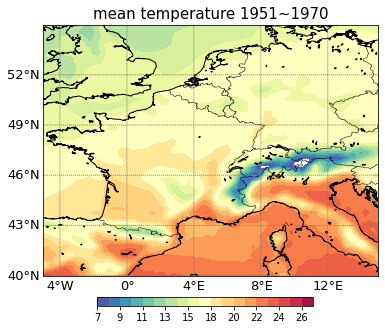

In [10]:
nrow = 1
ncol = 1
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(6,5))
plt.subplots_adjust(wspace = 0.2, hspace= 0.3)

data_plot1 =  data_JJA_EU.sel(time=slice('1951','1970')).mean(dim="time")

a = plot_eu(data_plot1, ax, 1951)
#cbar_ax = fig.add_axes([0.17, 0.07, 0.685, 0.025])        
#cmap = mpl.cm.Spectral_r
#norm = mpl.colors.Normalize(vmin=0., vmax=0.64)
#cbar = fig.colorbar(mpl.cm.ScalarMappable( cmap=cmap), cax=cbar_ax, orientation='horizontal')

### Plot multiple subplots within one figure

1951 1970
1971 1990
1991 2010


Text(0.5, 0.98, 'Western Europe summer mean temperature')

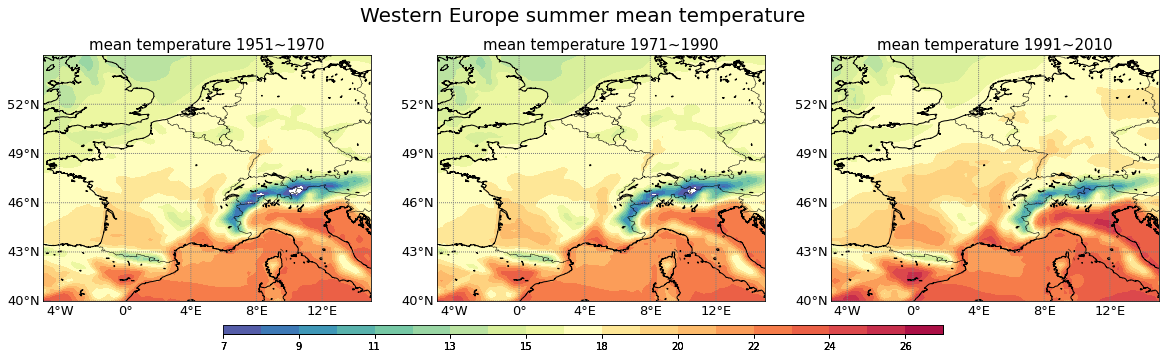

In [11]:
nrow = 1
ncol = 3
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20,5))


for index in range(0,3):
    startyear = 1950+index*20+1
    endyear = startyear + 19
    print(startyear, endyear)
    EU_20yr =  data_JJA_EU.sel(time=slice(str(startyear), str(endyear))).mean(dim="time")
    plot_eu(EU_20yr,ax[index],startyear)

fig.suptitle('Western Europe summer mean temperature', fontsize=20)
        
#cbar_ax = fig.add_axes([0.17, 0.07, 0.685, 0.025])        
#cmap = mpl.cm.Spectral_r
#norm = mpl.colors.Normalize(vmin=0., vmax=0.64)
#cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap), cax=cbar_ax, orientation='horizontal')